# 杭州萧山区项目`WRF-CMAQ`模拟分析
## 模拟结果分析：*`Process Analysis`*

---
*@author: Evan*\
*@date: 2023-08-30*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../../src/')
import ModelEvaLib as me
from namelist import *

## 读取数据

取地面1-4层为L1，5-19层为L2

In [2]:
pa = xr.open_dataset(pafile)

HADV_L1 = np.mean(pa.HADV_O3[:,:4,:,:],1)
ZADV_L1 = np.mean(pa.ZADV_O3[:,:4,:,:],1)
HDIF_L1 = np.mean(pa.HDIF_O3[:,:4,:,:],1)
VDIF_L1 = np.mean(pa.VDIF_O3[:,:4,:,:],1)
DDEP_L1 = np.mean(pa.DDEP_O3[:,:4,:,:],1)
CHEM_L1 = np.mean(pa.CHEM_O3[:,:4,:,:],1)

HADV_L2 = np.mean(pa.HADV_O3[:,4:19,:,:],1)
ZADV_L2 = np.mean(pa.ZADV_O3[:,4:19,:,:],1)
HDIF_L2 = np.mean(pa.HDIF_O3[:,4:19,:,:],1)
VDIF_L2 = np.mean(pa.VDIF_O3[:,4:19,:,:],1)
DDEP_L2 = np.mean(pa.DDEP_O3[:,4:19,:,:],1)
CHEM_L2 = np.mean(pa.CHEM_O3[:,4:19,:,:],1)

HADV_L1.shape

(744, 138, 135)

In [3]:
import geopandas as gpd
shp = gpd.read_file(shpxs)
lon = pa.longitude
lat = pa.latitude

mask = me.polygon_to_mask(shp.geometry[0],lon,lat)
mask_da = xr.DataArray(mask,dims=('y','x'))

masked_HADV_L1 = HADV_L1.where(mask_da)
HADV_mean_L1   = masked_HADV_L1.mean(dim=['y','x'],skipna=True)
masked_ZADV_L1 = ZADV_L1.where(mask_da)
ZADV_mean_L1   = masked_ZADV_L1.mean(dim=['y','x'],skipna=True)
masked_HDIF_L1 = HDIF_L1.where(mask_da)
HDIF_mean_L1   = masked_HDIF_L1.mean(dim=['y','x'],skipna=True)
masked_VDIF_L1 = VDIF_L1.where(mask_da)
VDIF_mean_L1   = masked_VDIF_L1.mean(dim=['y','x'],skipna=True)
masked_CHEM_L1 = CHEM_L1.where(mask_da)
CHEM_mean_L1   = masked_CHEM_L1.mean(dim=['y','x'],skipna=True)
masked_DDEP_L1 = DDEP_L1.where(mask_da)
DDEP_mean_L1   = masked_DDEP_L1.mean(dim=['y','x'],skipna=True)

masked_HADV_L2 = HADV_L2.where(mask_da)
HADV_mean_L2   = masked_HADV_L2.mean(dim=['y','x'],skipna=True)
masked_ZADV_L2 = ZADV_L2.where(mask_da)
ZADV_mean_L2   = masked_ZADV_L2.mean(dim=['y','x'],skipna=True)
masked_HDIF_L2 = HDIF_L2.where(mask_da)
HDIF_mean_L2   = masked_HDIF_L2.mean(dim=['y','x'],skipna=True)
masked_VDIF_L2 = VDIF_L2.where(mask_da)
VDIF_mean_L2   = masked_VDIF_L2.mean(dim=['y','x'],skipna=True)
masked_CHEM_L2 = CHEM_L2.where(mask_da)
CHEM_mean_L2   = masked_CHEM_L2.mean(dim=['y','x'],skipna=True)
masked_DDEP_L2 = DDEP_L2.where(mask_da)
DDEP_mean_L2   = masked_DDEP_L2.mean(dim=['y','x'],skipna=True)

HADV_mean_L1.shape

(744,)

In [4]:
timeindex = pd.date_range(timestart,timeend,freq='h')
df_L1 = pd.DataFrame(
    index=timeindex,
    data={'HADV':HADV_mean_L1,'ZADV':ZADV_mean_L1,'HDIF':HDIF_mean_L1,
          'VDIF':VDIF_mean_L1,'CHEM':CHEM_mean_L1,'DDEP':DDEP_mean_L1}
    )
df_L2 = pd.DataFrame(
    index=timeindex,
    data={'HADV':HADV_mean_L2,'ZADV':ZADV_mean_L2,'HDIF':HDIF_mean_L2,
          'VDIF':VDIF_mean_L2,'CHEM':CHEM_mean_L2,'DDEP':DDEP_mean_L2}
    )

df_mda8L1 = df_L1.rolling(8).mean().resample('D').max()
df_mda8L2 = df_L2.rolling(8).mean().resample('D').max()

## 绘图

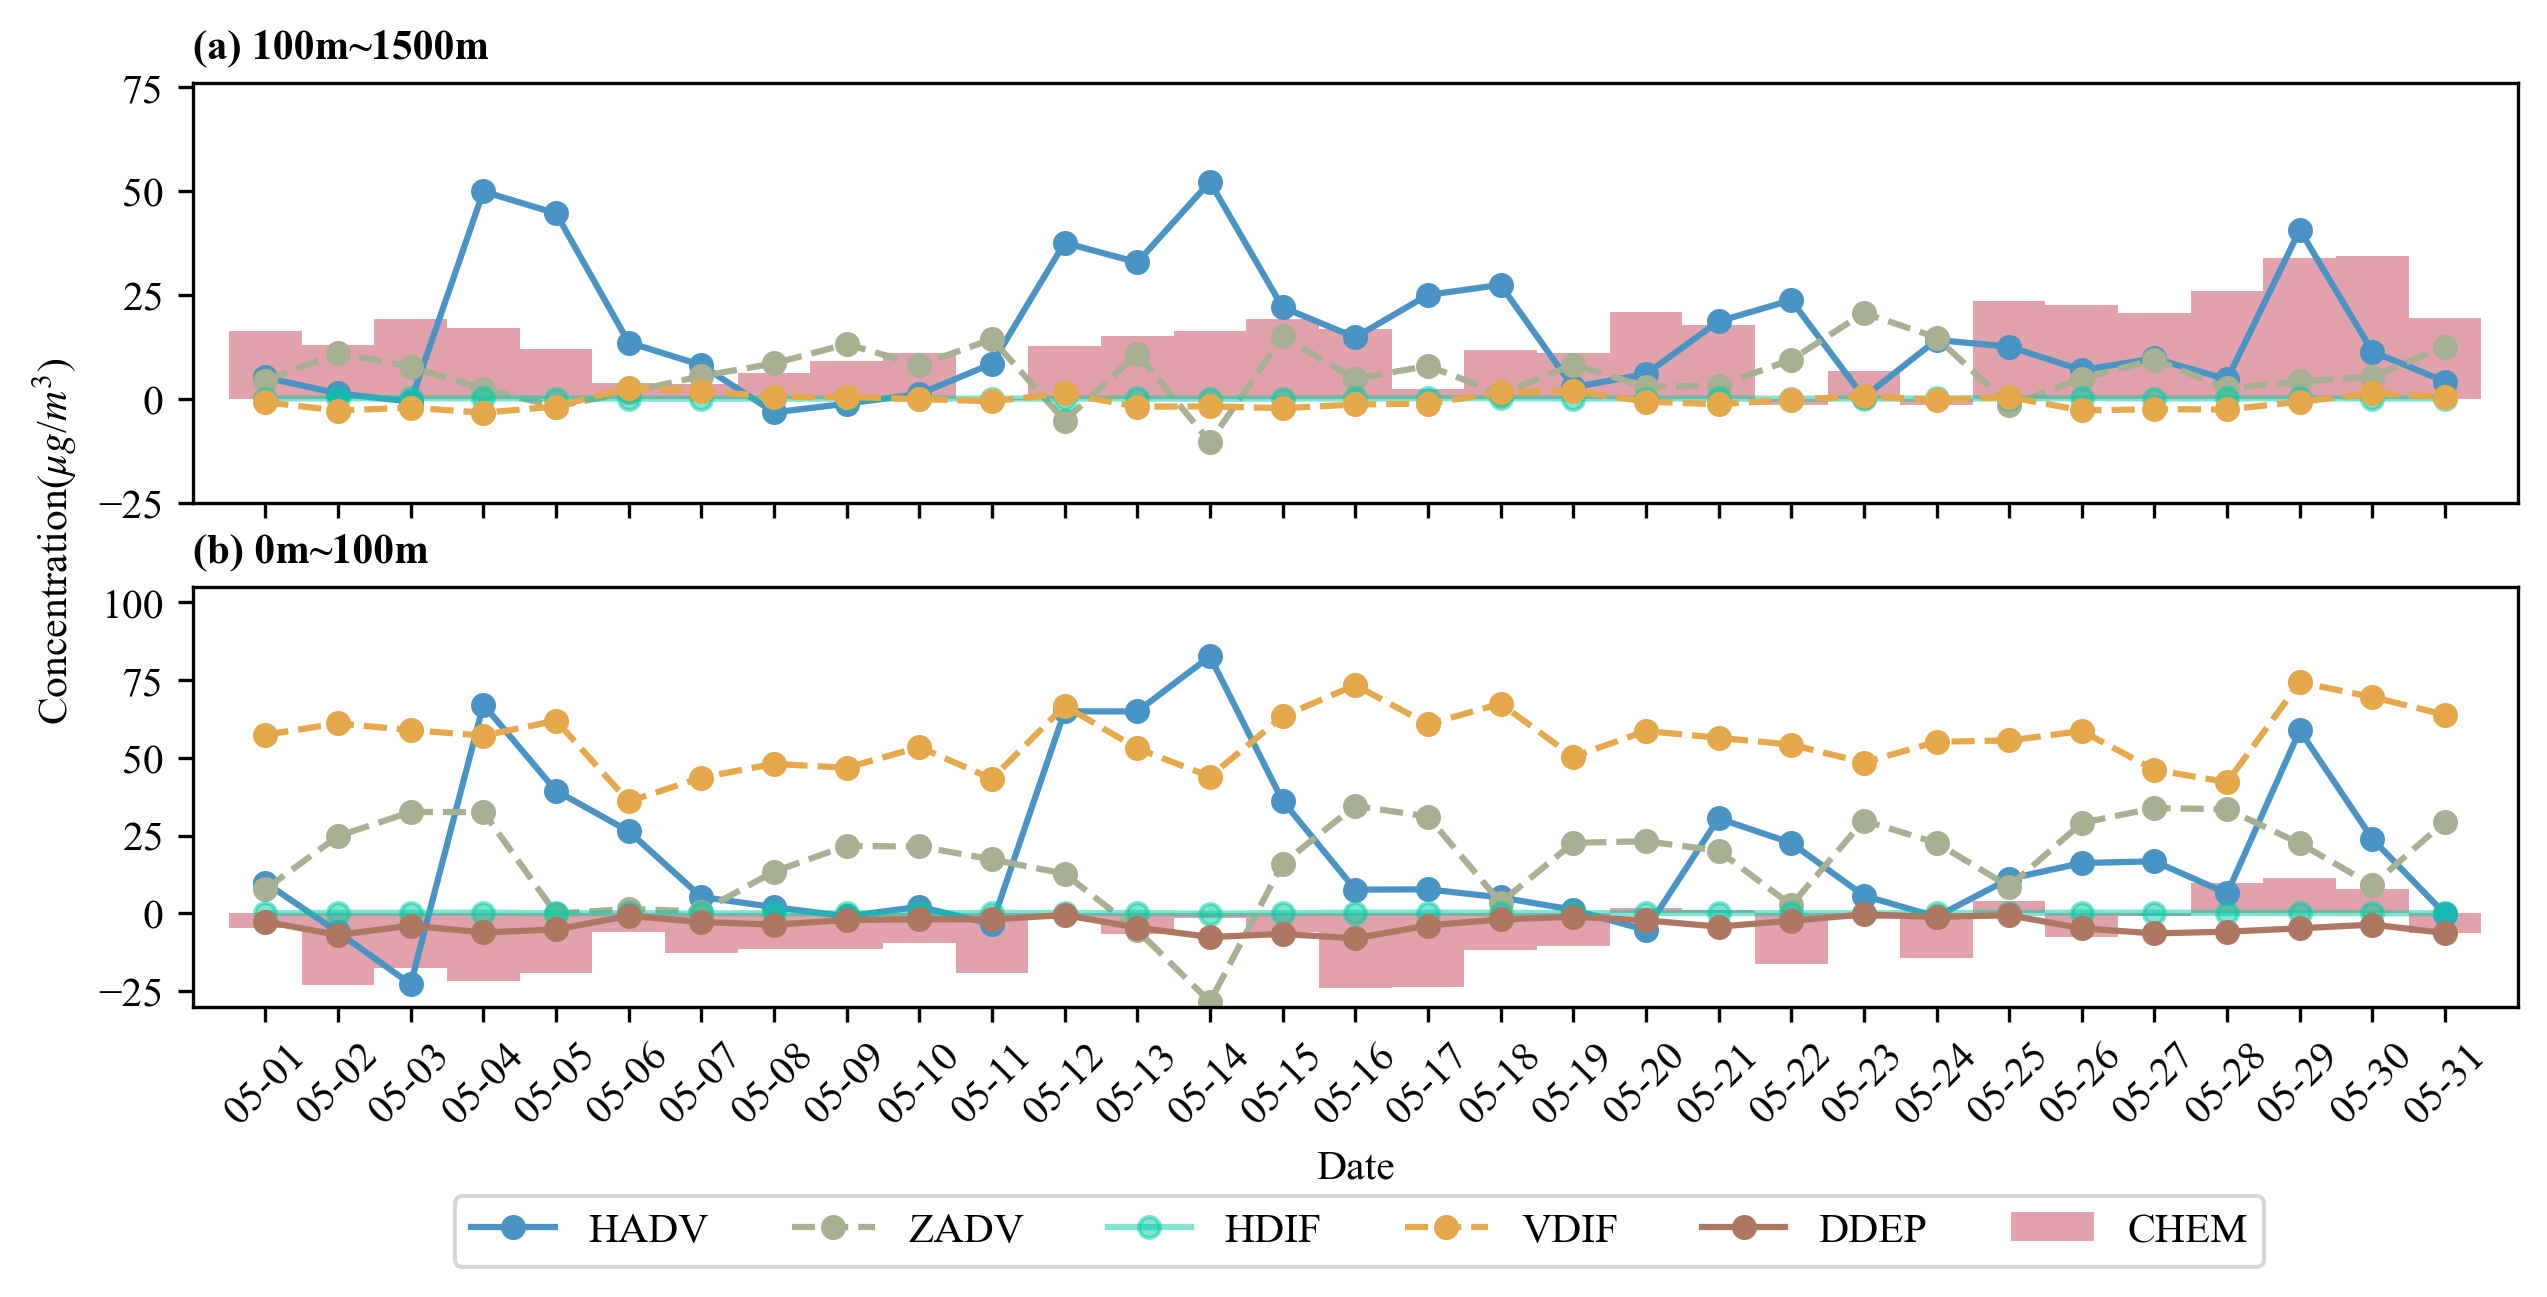

In [6]:
colors = ['#4994c4','#a8b092','#00cca6',
          '#e5a84b','#e2a2ac','#ad7761']

ts=np.arange(0,31)

fig=plt.figure(figsize=(10,4),dpi=300)
ax=fig.subplots(2,1)

b1=ax[1].plot(ts,df_mda8L1['HADV'],marker='.',markersize=10,linestyle='-',color=colors[0],label='HADV')
b2=ax[1].plot(ts,df_mda8L1['ZADV'],marker='.',markersize=10,linestyle='--',color=colors[1],label='ZADV')
b3=ax[1].plot(ts,df_mda8L1['HDIF'],marker='.',markersize=10,linestyle='-',color=colors[2],alpha=0.5,label='HDIF')
b4=ax[1].plot(ts,df_mda8L1['VDIF'],marker='.',markersize=10,linestyle='--',color=colors[3],label='VDIF')
b5=ax[1].bar(ts,df_mda8L1['CHEM'],width=1,color=colors[4],label='CHEM')
b6=ax[1].plot(ts,df_mda8L1['DDEP'],marker='.',markersize=10,linestyle='-',color=colors[5],label='DDEP')

b1=ax[0].plot(ts,df_mda8L2['HADV'],marker='.',markersize=10,linestyle='-',color=colors[0],label='HADV')
b2=ax[0].plot(ts,df_mda8L2['ZADV'],marker='.',markersize=10,linestyle='--',color=colors[1],label='ZADV')
b3=ax[0].plot(ts,df_mda8L2['HDIF'],marker='.',markersize=10,linestyle='-',color=colors[2],alpha=0.5,label='HDIF')
b4=ax[0].plot(ts,df_mda8L2['VDIF'],marker='.',markersize=10,linestyle='--',color=colors[3],label='VDIF')
b5=ax[0].bar(ts,df_mda8L2['CHEM'],width=1,color=colors[4],label='CHEM')

ax[1].set_xlabel('Date')
ax[1].set_xticks(np.arange(0,31))
ax[1].set_xticklabels(pd.date_range(timestart,timeend,freq='D').strftime('%m-%d'),rotation=45)
ax[1].set_yticks(np.arange(-50,130,25))
ax[1].set_ylim([-30,105])
ax[1].set_xlim([-1,31])
ax[1].set_title('(b) 0m~100m',fontdict={'fontsize':10,'weight':'bold'},loc='left')

ax[0].set_xticks(np.arange(0,31))
ax[0].set_xticklabels([])
ax[0].set_yticks(np.arange(-50,101,25))
ax[0].text(x=-0.07,y=-0.5,s='Concentration($\mu$$g$/$m^3$)',rotation=90,transform=ax[0].transAxes)
ax[0].set_ylim([-25,76])
ax[0].set_xlim([-1,31])
ax[0].set_title('(a) 100m~1500m',fontdict={'fontsize':10,'weight':'bold'},loc='left')

ax[1].legend(bbox_to_anchor=(0.9,-0.4),ncol=6)

# plt.suptitle('Process Analysis of O$_3$ in Anqing')

plt.show()